In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import os

In [3]:
# =============================================================================
# SECTION 1: DATA LOADING AND PREPROCESSING
# =============================================================================
def load_and_prepare_data(train_file, test_file):
    print("Loading datasets...")
    
    if not os.path.exists(train_file) or not os.path.exists(test_file):
        print("❌ Error: Dataset files not found. Please run the previous data preparation step first.")
        return None, None, None, None

    # Load Training and Testing Data
    train_df = pd.read_csv(train_file)
    test_df = pd.read_csv(test_file)

    # Define Features (Raw Inputs x1 to x7) and Target (Remarks)
    # Note: ML models can handle all 7 raw inputs efficiently.
    feature_cols = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']
    target_col = 'Remarks'

    # Preprocessing: Ensure 'Remarks' is clean numeric (1-5)
    # (Assuming the files created in the previous step are already clean, but adding a safety check)
    def clean_target(df):
        df[target_col] = df[target_col].astype(str).str.replace('Class', '').str.strip()
        df = df[df[target_col].apply(lambda x: x.isdigit())]
        df[target_col] = df[target_col].astype(int)
        return df

    train_df = clean_target(train_df)
    test_df = clean_target(test_df)

    X_train = train_df[feature_cols]
    y_train = train_df[target_col]
    X_test = test_df[feature_cols]
    y_test = test_df[target_col]

    print(f"✅ Data Loaded. Training Samples: {len(X_train)}, Testing Samples: {len(X_test)}")
    return X_train, y_train, X_test, y_test

# Load Data (Using subset_1 for Training and subset_2 for Testing to compare with Fuzzy Model)
X_train, y_train, X_test, y_test = load_and_prepare_data('fis_subset_1.csv', 'fis_subset_2.csv')

Loading datasets...
✅ Data Loaded. Training Samples: 100, Testing Samples: 100


In [4]:
# =============================================================================
# SECTION 2: MACHINE LEARNING BENCHMARKING
# =============================================================================

def train_and_evaluate(model, model_name, X_train, y_train, X_test, y_test):
    print(f"\n⚙️ Training {model_name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on Test Data
    y_pred = model.predict(X_test)
    
    # Calculate Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"🏆 {model_name} Accuracy: %{acc*100:.2f}")
    
    # Visualization: Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=[1,2,3,4,5], yticklabels=[1,2,3,4,5])
    plt.title(f'{model_name}\nAccuracy: %{acc*100:.1f}')
    plt.ylabel('Actual Grade')
    plt.xlabel('Predicted Grade')
    plt.show()
    
    return acc


⚙️ Training Decision Tree...
🏆 Decision Tree Accuracy: %58.00


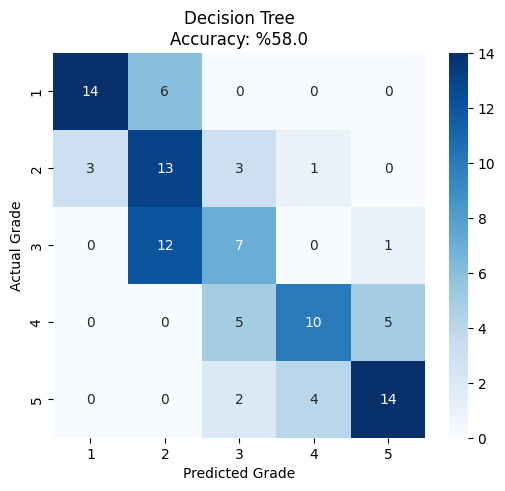


⚙️ Training Random Forest...
🏆 Random Forest Accuracy: %63.00


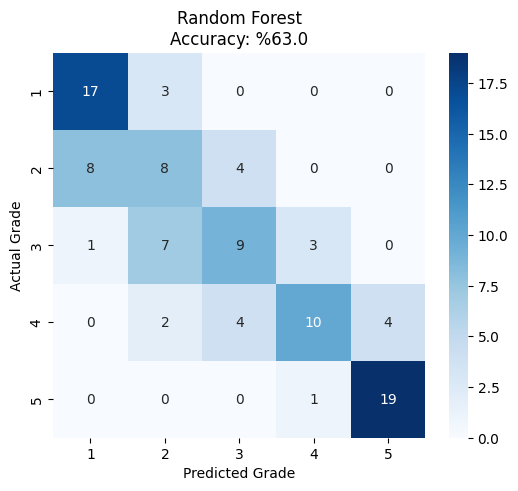


📊 BENCHMARK SUMMARY
------------------------------
Decision Tree Accuracy : %58.00
Random Forest Accuracy : %63.00


In [5]:
if X_train is not None:
    # --- Model 1: Decision Tree Classifier ---
    # A single tree structure, highly interpretable but prone to overfitting.
    dt_model = DecisionTreeClassifier(random_state=42, max_depth=5) 
    dt_acc = train_and_evaluate(dt_model, "Decision Tree", X_train, y_train, X_test, y_test)

    # --- Model 2: Random Forest Classifier ---
    # Ensemble of multiple trees, generally more robust and accurate.
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
    rf_acc = train_and_evaluate(rf_model, "Random Forest", X_train, y_train, X_test, y_test)

    # --- Comparison Summary ---
    print("\n📊 BENCHMARK SUMMARY")
    print("-" * 30)
    print(f"Decision Tree Accuracy : %{dt_acc*100:.2f}")
    print(f"Random Forest Accuracy : %{rf_acc*100:.2f}")
    # Note: Compare these values with your Fuzzy Logic Model score (~58%)